In [1]:
%matplotlib inline
import pandas as pd
import os
from collections import Counter
import os.path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [2]:
def get_visual_genome_filename(image_id):
    #print os.path.join(VG_BASEDIR, '{0}.jpg'.format(image_id))
    return os.path.join(VG_BASEDIR, '{0}.jpg'.format(image_id))
VG_BASEDIR = '/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K'


In [3]:
def plot_labelled_bb(impath, bblist, title=None, text_size='large',
                     mode='path', omode='screen', opath = None):
    '''Given the path of an image and a list containing tuples 
    of bounding box (a list of x,y,w,h) and label (str), 
    plot these boxes and labels into the image.
    If mode is path, impath is path, if it is image, impath is the actual
    image on top of which the bbs are to be drawn.
    If omode is screen, assumption is that matplotlib functions are
    displayed directly (i.e., IPython inline mode), if it is
    img, function saves the plot to opath.'''

    if mode=='path':
        img = plt.imread(impath)
    elif mode=='img':
        img = impath

    fig, ax = plt.subplots()
    fig.set_size_inches(10,20)
    ax.imshow(img)

    if bblist is not None:
        for (this_bb, this_label,this_col) in bblist:
            x,y,w,h = this_bb

            ax.add_patch(
                matplotlib.patches.Rectangle(
                    (x, y),
                    w,
                    h,
                    edgecolor=this_col,
                    fill=False,      # remove background
                    linewidth=3
                )
            )
            if this_label != '':
                ax.text(x,y, this_label, size=text_size, style='italic',
                        bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    if title is not None:
        ax.set_title(title)
    ax.axis('off')

    if omode == 'img':
        fig.savefig(opath, bbox_inches = 'tight', pad_inches = 0)
        plt.close()  # to supress showing the plot in interactive mode



In [5]:
vgdf = pd.read_json("/Volumes/SHK-DropBox/036_object_parts/PreProcOut/vg_object_bbdf.json.gz",compression='gzip', orient='split')

In [10]:
vgdf.head(10)

,object_id,image_id,bb,name,synsets,parts
0,1058529,1,"[238, 249, 60, 262]",man,[man.n.01],"[1058518, 1058511]"
1,1058530,1,"[356, 296, 89, 97]",jacket,[jacket.n.01],[]
2,1058531,1,"[382, 369, 54, 128]",pants,[trouser.n.01],[]
3,5060,1,"[721, 339, 67, 170]",back,[back.n.01],[]
4,1058511,1,"[241, 289, 59, 101]",shirt,[shirt.n.01],[]
5,1058515,1,"[708, 342, 91, 174]",car,[car.n.01],[5060]
6,1058532,1,"[372, 264, 75, 251]",man,[man.n.01],"[1058530, 1058531, 1058525]"
7,1058518,1,"[271, 268, 20, 12]",glasses,[spectacles.n.01],[]
8,5049,1,"[479, 315, 74, 98]",car,[car.n.01],[5050]
9,5050,1,"[514, 366, 23, 15]",headlight,[headlight.n.01],[]


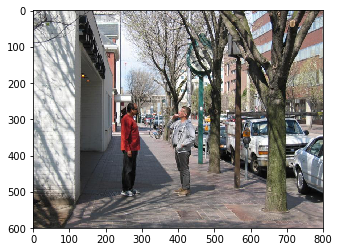

In [9]:
plt.imshow(plt.imread(get_visual_genome_filename(1)))

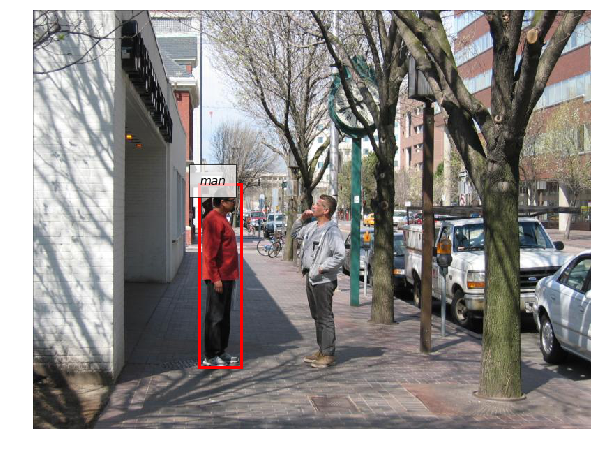

In [12]:
plot_labelled_bb(get_visual_genome_filename(1),[([238, 249, 60, 262],'man','r')])

% --- end of plotting demo for Simeon 

In [69]:
Counter(vgdf.name).most_common(100)

[('man', 11198),
 ('hair', 7911),
 ('head', 6772),
 ('window', 6358),
 ('leg', 5931),
 ('woman', 5768),
 ('ear', 5253),
 ('eye', 4518),
 ('hand', 4412),
 ('person', 4133),
 ('nose', 3862),
 ('tail', 3417),
 ('building', 3249),
 ('shirt', 3189),
 ('arm', 2606),
 ('tree', 2589),
 ('face', 2557),
 ('wheel', 2291),
 ('giraffe', 2121),
 ('handle', 2099),
 ('door', 1973),
 ('cat', 1894),
 ('mouth', 1836),
 ('legs', 1819),
 ('elephant', 1748),
 ('dog', 1727),
 ('sign', 1720),
 ('boy', 1719),
 ('girl', 1719),
 ('zebra', 1711),
 ('shadow', 1642),
 ('foot', 1566),
 ('horse', 1482),
 ('neck', 1449),
 ('train', 1417),
 ('car', 1386),
 ('eyes', 1363),
 ('trunk', 1351),
 ('windows', 1336),
 ('leaves', 1326),
 ('plane', 1303),
 ('wall', 1279),
 ('sky', 1215),
 ('stripe', 1207),
 ('cow', 1175),
 ('bear', 1170),
 ('light', 1147),
 ('clock', 1141),
 ('bird', 1124),
 ('bus', 1082),
 ('edge', 1068),
 ('wing', 1059),
 ('tire', 1017),
 ('shoe', 1007),
 ('hat', 1002),
 ('spot', 998),
 ('ears', 992),
 ('pole'

In [ ]:
im

In [6]:
len(set(vgdf.image_id))

50452

In [54]:
PARTNOUNS = ['ear','leg','arm','hair','eye','hand','lid','wheel','tire','stem','sauce','light',\
             'head','shirt','license','brick','branches','wrist','mirror','keyboard','drawer','curtain','front','socks',\
            'foot','stripe','shelf','deck']
def is_part(name):
    for p in PARTNOUNS:
        if p in name:
            return True
    return False

In [92]:
of = open("vgpilot.html",'w')
print("<html> <head> <style> table, th, td {border: 1px solid black;border-collapse: ' + \
'collapse;} th, td {padding: 15px;} </style> </head>",file=of)
print('<body> <form method="POST"> <table style="width:100%">',file=of)

In [93]:
TARGETS = ['car','building','man','woman','cat','tree','table','sofa',\
           'chair','dog','elephant','player','motorcycle','truck','bike','house','player','skateboard','flower','food','person','giraffe','bear']

In [94]:
icount = 0

for i in range(1050):
    
    imdf = vgdf[vgdf.image_id == i]
    this_names = Counter(list(imdf.name))
    for n in this_names:
        if n in TARGETS:
            if this_names[n] > 1: 
                icount += 1
                print(i, n)
                print(get_visual_genome_filename(i))
                print(os.path.exists(get_visual_genome_filename(i)))
                namedf = imdf[imdf.name == n]
                print(namedf.iloc[0]['bb'])
                print(namedf.iloc[1]['bb'])
                bblist = [(namedf.iloc[0]['bb'],"A+"+n,'r'),(namedf.iloc[1]['bb'],"B+"+n,'b')]
                plot_labelled_bb(get_visual_genome_filename(i),bblist,omode="img",opath="vgpilot/%d_%s.jpg"%(i,n))
                
        
                
                print('<tr>',file=of)
                print('<td>item %d </td>'%icount,file=of)
                print('<td><img src="%s" width="350"/></td>' % ("vgpilot/%d_%s.jpg"%(i,n)),file=of)
                print('<td> Both A and B are a : %s </td>' % (n),file=of)
                print('<td> A (and not B) is a : ???? </td>',file=of)
                print('</tr>',file=of)


1 man
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/1.jpg
True
[238, 249, 60, 262]
[372, 264, 75, 251]
1 car
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/1.jpg
True
[708, 342, 91, 174]
[479, 315, 74, 98]
26 building
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/26.jpg
True
[513, 100, 160, 263]
[35, 142, 145, 250]
37 table
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/37.jpg
True
[7, 399, 93, 99]
[352, 401, 447, 131]
38 table
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/38.jpg
True
[245, 581, 267, 217]
[146, 357, 242, 312]
44 chair
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/44.jpg
True
[350, 19, 93, 25]
[253, 216, 64, 69]
44 table
/Volumes/data/Corpora/External/ImageCorpora/visualgenome-v1-2/images/VG_100K/44.jpg
True
[95, 40, 177, 157]
[459, 316, 188, 214]
54 building
/Volumes/data/Corpora/External

In [95]:
of.close()
